# ダウンズの合理的選択理論への反論

(Version: 0.0.2)

以下で私がアンソニー・ダウンズの合理的選択理論について反論したことを Claude Sonnet 4 さんと Gemini 2.5 Pro さんに数学的に(プログラム的に)示してもらった。 特に「相転移的効果」についての部分である。

《finalvent さんが紹介されていたダウンズの合理的選択理論の投票行動の期待効用について、私なりの式を考えた。氏は合理的でない無党派層の投票行動が、選挙を予測不能というか操作不能にしている…と見ているが、私は本来の公正な社会に近付いていると見る。- JRF のひとこと》  
http://jrf.cocolog-nifty.com/statuses/2024/12/post-162a52.html

＞＞
《間接民主主義制度の限界: 極東ブログ》  
http://finalvent.cocolog-nifty.com/fareastblog/2024/12/post-31fe90.html

＞　「一票が無意味である」という構造的事実をアンソニー・ダウンズの合理的選択理論は、投票行動の期待効用を次のように数式化した：

　期待効用=B×P−C
　　B: 候補者が当選した場合に得られる利益。
　　P: 自分の一票が選挙結果を左右する確率。
　　C: 投票にかかるコスト。

(…)

従来の「投票をしよう」という倫理的な呼びかけが持つ期待とは異なる結果が生まれ、政治的な結果に予測不能な影響を及ぼす現象が顕著になっている。

＜

B×P が間違いであると直感する。P は単に一票ではなく、自分が投票しようとする場合、同じように投票する者がどれぐらいるかの量が問題となるように思う。自分が動くとき他が相転移的に動いていることを見ている確率のように思う。

(…)

ダウンズの理論は以下の点でおかしいと考える。

選挙の結果により政策A1と政策A2だけが異なるとする。自分が参加することで似た他の人も参加し A1 が実行される可能性が p1 になるとする。自分が参加しないことで似た他の人も参加しないことで A1 が実行される可能性が p2 になるとする。投票のコストを C とする。

選択(投票行動)の効用は、A1 * p1 + A2 * (1 - p1) - A1 * p2 - A2 * (1 - p2) - C になる。

これは = (A1 - A2) * (p1 - p2) - C。

ダウンズの理論は p1 - p2 を P という極小のものに見つもる。それが間違っている。p1 - p2 はとても大きいものであることが許されるはずだ。

ただ、なぜ許されるのか？ 相転移とかカオスセオリーとかありそうだが、そこはまだ私には理論化できない orz。

＜＜

## Claude さんの議論

Claude さんに相転移的モデルを作って欲しいとお願いしたところ、次のようなアーティファクトを書いてくれた。

＞＞
# 投票行動における相転移の数学的モデル

## 1. 基本的なしきい値モデル（Threshold Model）

各有権者 i が投票する確率を P_i とし、これが他の有権者の投票率に依存するとする：

```
P_i(t+1) = f(Σ w_ij * P_j(t))
```

ここで：
- w_ij は有権者 j が有権者 i に与える影響の重み
- f() は活性化関数（例：シグモイド関数）

## 2. シグモイド関数による相転移

```
P_i(t+1) = 1 / (1 + exp(-α(Σ w_ij * P_j(t) - θ_i)))
```

- α: 感度パラメータ（大きいほど急激な変化）
- θ_i: 個人のしきい値

## 3. イジングモデルの応用

各有権者の状態を σ_i = ±1 （+1:投票、-1:棄権）として：

```
H = -Σ J_ij * σ_i * σ_j - Σ h_i * σ_i
```

- J_ij: 相互作用の強さ
- h_i: 外部場（メディア影響など）

投票確率：
```
P(σ_i = +1) = exp(β * Σ J_ij * σ_j + β * h_i) / Z
```

## 4. あなたのp1-p2モデルの拡張

自分が投票した場合の投票率変化を：

```
p1 = p0 + Δp * tanh(β * (N * p0 - N_c))
```

自分が棄権した場合：
```
p2 = p0 - Δp * tanh(β * (N * p0 - N_c))
```

ここで：
- p0: 基準投票率
- Δp: 最大変化幅
- N_c: 臨界有権者数
- β: 急峻さパラメータ

## 5. 相転移点の特定

臨界点では：
```
∂p1/∂p0 → ∞
```

これは以下の条件で発生：
```
β * N * sech²(β * (N * p0 - N_c)) = 1
```

## 6. 社会的影響の連鎖反応モデル

ネットワーク上での影響伝播：

```
dp_i/dt = -γ * p_i + Σ_j A_ij * f(p_j) + η_i(t)
```

- γ: 減衰係数
- A_ij: 隣接行列
- η_i(t): ランダムノイズ

## 7. 臨界現象の特徴

相転移点近くでは：
- **べき乗則**: C(r) ∼ r^(-d+2-η) （相関関数）
- **発散する相関長**: ξ ∼ |T-T_c|^(-ν)
- **臨界指数**: 各種物理量が特徴的な指数で発散

## 8. 実用的な予測式

あなたの直感的なアイデアを数式化すると：

```
効用 = (A1 - A2) * [p0 + Δp * tanh(β * (自分の影響力)) - p0 + Δp * tanh(β * (自分の影響力))] + (D - C)
     = (A1 - A2) * 2 * Δp * tanh(β * (自分の影響力)) + (D - C)
```

この式では、自分の影響力が大きいほど、また相転移点に近いほど効用が大きくなります。

## 9. パラメータの推定方法

実際のデータから以下を推定可能：
- 過去の選挙データから基準投票率 p0
- SNSやメディアの影響から w_ij
- 投票行動の急激な変化点から β, N_c
- 個人の政治的関心度から θ_i

## 10. 予測への応用

このモデルを使えば：
1. 特定の働きかけが全体の投票率に与える影響を予測
2. 相転移が起こりやすい条件（接戦状況など）の特定
3. 個人の投票行動の合理性の再評価

が可能になります。

＜＜

## Gemini さんによるプログラム

以上を Claude さんにプログラムで書いてもらったのだが、React のプログラムで私は読めない。その上に、どうも無限ループに陥ってるらしくインタラクティブアーティファクトがちゃんと表示されない。修正もお願いしたが、ダメで無料枠を使い切ってしまった。

そこで Gemini Pro さんに Python でのプログラムをお願いすることにした。そうしてできたのが以下になる。

In [1]:
!pip install -q japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
import japanize_matplotlib

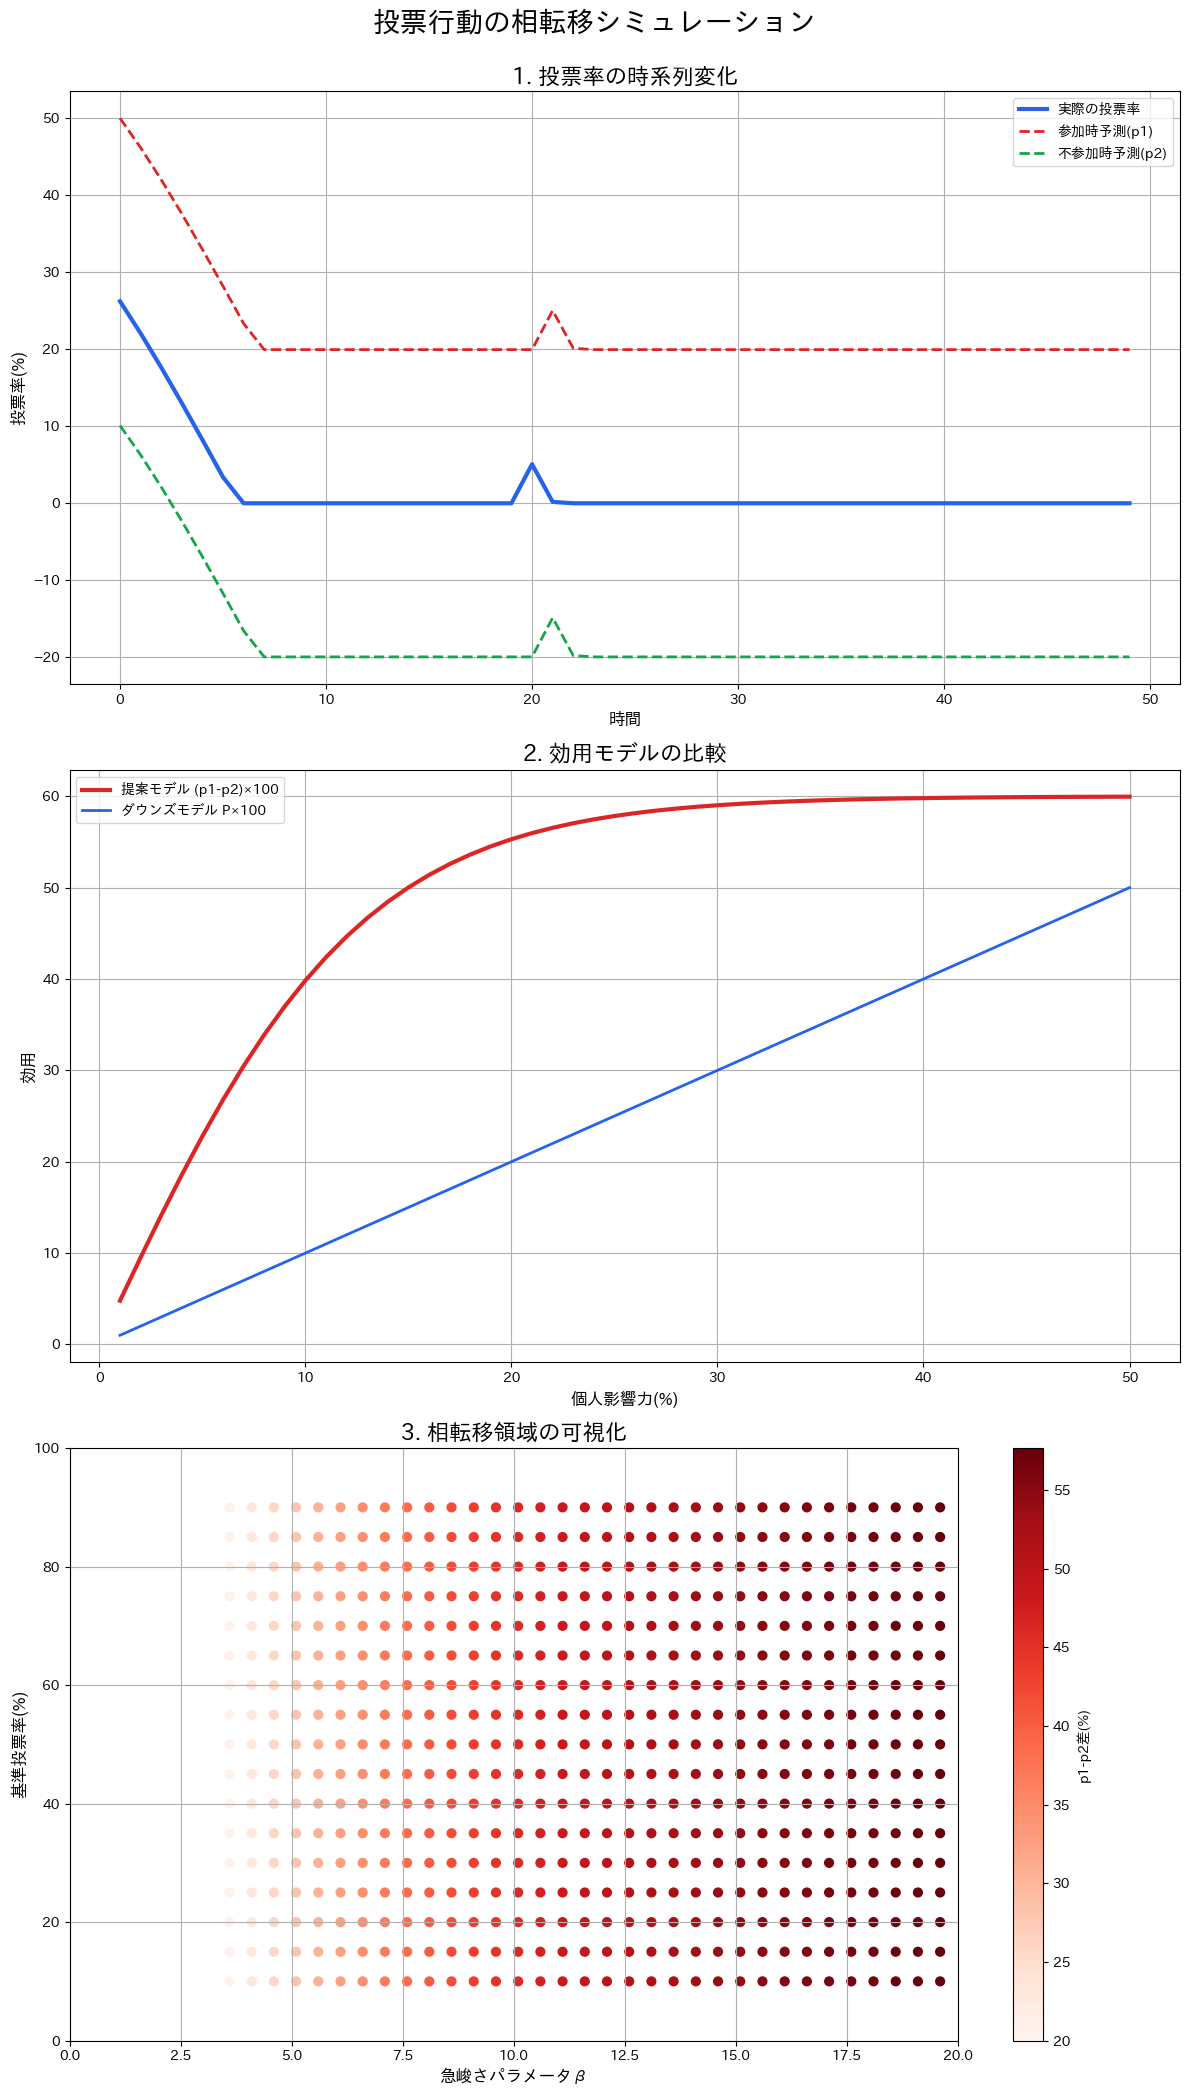

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ==============================================================================
# Google Colab用パラメータ設定フォーム
# @paramディレクティブを使うことで、コードを変更せずにUIで値を変更できます。
# { run: "auto" } をつけると、パラメータ変更時にセルが自動で再実行されます。
# ==============================================================================
#@title 投票行動シミュレーションのパラメータ設定 { run: "auto" }
#@markdown ---
#@markdown ### シミュレーションの主要パラメータを調整してください

#@markdown **感度α (alpha):** 周囲の投票率への反応の強さ
alpha = 5.0 #@param {type:"slider", min:1, max:15, step:0.5}

#@markdown **急峻さβ (beta):** 個人の影響力が効用に反映される度合い
beta = 8.0 #@param {type:"slider", min:1, max:20, step:1}

#@markdown **変化幅Δp (delta_p):** 自分の投票行動が変えうる投票率の最大幅
delta_p = 0.3 #@param {type:"slider", min:0.1, max:0.5, step:0.05}

#@markdown **個人影響力 (influence):** 自分が投票結果に与える影響の大きさ
influence = 0.1 #@param {type:"slider", min:0.01, max:0.3, step:0.01}


# ==============================================================================
# シミュレーションクラスの定義
# ==============================================================================
class VotingSimulation:
    """
    投票行動における相転移をシミュレートするクラス。
    提示された数学的モデルとReactアプリケーションのロジックを統合。
    """
    def __init__(self, params):
        """
        シミュレーションのパラメータを初期化する。
        """
        self.params = params

    def phase_transition(self, p0, influence, beta, delta_p):
        """
        数式モデル4: 自分の投票参加/不参加がもたらす投票率の変化を計算する。
        p1 = 投票した場合の予測投票率
        p2 = 棄権した場合の予測投票率
        """
        tanh_term = np.tanh(beta * influence)
        p1 = p0 + delta_p * tanh_term
        p2 = p0 - delta_p * tanh_term
        return p1, p2

    def run_time_series_simulation(self):
        """
        分析1: 投票率の時系列シミュレーションを実行する。
        数式モデル1, 2, 6の概念を簡略化して適用。
        """
        data = []
        p = self.params
        current_p = p['initial_p']

        for t in range(50):
            # 外部ショック（メディア報道、SNSバイラルなど）
            shock = 0.1 if t == 20 else (-0.15 if t == 35 else 0)

            # 相互作用による投票率変化（しきい値モデル）
            influence_effect = p['alpha'] * (current_p - p['theta'])
            new_p = np.clip(current_p + 0.05 * np.tanh(influence_effect) + shock, 0, 1)

            # 現在の投票率における個人の影響を計算
            p1, p2 = self.phase_transition(current_p, p['influence'], p['beta'], p['delta_p'])

            data.append({
                'time': t,
                'voting_rate': new_p * 100,
                'p1': p1 * 100,
                'p2': p2 * 100,
            })
            current_p = new_p
        return data

    def analyze_utility(self):
        """
        分析2: 効用モデルの比較分析。
        数式モデル8「実用的な予測式」を可視化する。
        """
        data = []
        p = self.params
        influence_range = np.arange(0.01, 0.51, 0.01)

        for influence_val in influence_range:
            # 基準投票率0.5を仮定して効用を計算
            p1, p2 = self.phase_transition(0.5, influence_val, p['beta'], p['delta_p'])
            # 効用 = (p1 - p2) * (A1 - A2)。(A1 - A2)=100と仮定。
            utility = (p1 - p2) * 100
            # ダウンズモデルの効用 P*B。B=100と仮定。
            downs_utility = influence_val * 100

            data.append({
                'influence': influence_val * 100,
                'your_model': utility,
                'downs_model': downs_utility
            })
        return data

    def analyze_phase_transition(self):
        """
        分析3: 相転移領域を可視化する。
        数式モデル5「相転移点の特定」の概念に基づき、パラメータ空間を探索する。
        """
        data = []
        p = self.params
        beta_range = np.arange(0.1, 20.1, 0.5)
        p0_range = np.arange(0.1, 0.91, 0.05)

        for beta_val in beta_range:
            for p0_val in p0_range:
                p1, p2 = self.phase_transition(p0_val, p['influence'], beta_val, p['delta_p'])
                difference = np.abs(p1 - p2)
                # p1-p2の差が0.2 (20%)以上を臨界点（相転移が顕著）と定義
                if difference > 0.2:
                    data.append({
                        'beta': beta_val,
                        'p0': p0_val * 100,
                        'difference': difference * 100
                    })
        return data

    def plot_all_results(self):
        """
        全分析結果を3つのグラフに描画する。
        """
        # 各分析を実行
        time_series_data = self.run_time_series_simulation()
        utility_data = self.analyze_utility()
        phase_transition_data = self.analyze_phase_transition()

        # グラフ描画領域の設定
        fig, axes = plt.subplots(3, 1, figsize=(12, 22))
        fig.suptitle('投票行動の相転移シミュレーション', fontsize=20, y=0.95)

        # グラフ1: 投票率の時系列変化
        ax1 = axes[0]
        ax1.plot([d['time'] for d in time_series_data], [d['voting_rate'] for d in time_series_data], label='実際の投票率', color='#2563eb', lw=3)
        ax1.plot([d['time'] for d in time_series_data], [d['p1'] for d in time_series_data], label='参加時予測(p1)', color='#dc2626', lw=2, ls='--')
        ax1.plot([d['time'] for d in time_series_data], [d['p2'] for d in time_series_data], label='不参加時予測(p2)', color='#16a34a', lw=2, ls='--')
        ax1.set_title('1. 投票率の時系列変化', fontsize=16)
        ax1.set_xlabel('時間', fontsize=12)
        ax1.set_ylabel('投票率(%)', fontsize=12)
        ax1.legend()
        ax1.grid(True)

        # グラフ2: 効用モデルの比較
        ax2 = axes[1]
        ax2.plot([d['influence'] for d in utility_data], [d['your_model'] for d in utility_data], label='提案モデル (p1-p2)×100', color='#dc2626', lw=3)
        ax2.plot([d['influence'] for d in utility_data], [d['downs_model'] for d in utility_data], label='ダウンズモデル P×100', color='#2563eb', lw=2)
        ax2.set_title('2. 効用モデルの比較', fontsize=16)
        ax2.set_xlabel('個人影響力(%)', fontsize=12)
        ax2.set_ylabel('効用', fontsize=12)
        ax2.legend()
        ax2.grid(True)

        # グラフ3: 相転移領域の可視化
        ax3 = axes[2]
        if phase_transition_data:
            betas = [d['beta'] for d in phase_transition_data]
            p0s = [d['p0'] for d in phase_transition_data]
            diffs = [d['difference'] for d in phase_transition_data]
            scatter = ax3.scatter(betas, p0s, c=diffs, cmap='Reds', s=40, vmin=20)
            fig.colorbar(scatter, ax=ax3, label='p1-p2差(%)')
        else:
            ax3.text(0.5, 0.5, 'このパラメータでは\n相転移領域が見つかりません', ha='center', va='center', fontsize=14)

        ax3.set_title('3. 相転移領域の可視化', fontsize=16)
        ax3.set_xlabel('急峻さパラメータβ', fontsize=12)
        ax3.set_ylabel('基準投票率(%)', fontsize=12)
        ax3.set_xlim(0, 20)
        ax3.set_ylim(0, 100)
        ax3.grid(True)

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

# ==============================================================================
# シミュレーションの実行
# ==============================================================================

# Colabフォームで設定されたパラメータを辞書にまとめる
params = {
    'alpha': alpha,
    'beta': beta,
    'delta_p': delta_p,
    'influence': influence,
    'theta': 0.5,      # 固定パラメータ: 投票率が影響を受け始める閾値
    'initial_p': 0.3,  # 固定パラメータ: シミュレーション開始時の投票率
}

# シミュレーションのインスタンスを作成し、結果をプロット
simulation = VotingSimulation(params=params)
simulation.plot_all_results()

以上は相転移のシミュレーションではなく、単にそういう場合の数値をどう求めるかのシミュレーションのようで、納得感はあまりないかもしれないが、基本的にそういう相転移的考えは間違ってないとして、Gemini さんや Claude さんに支持された。

会話ログは↓。

https://claude.ai/share/60dab319-1886-48df-8d35-0e176b5c9483  

https://g.co/gemini/share/ed07122b6314  

# Gemini 2.5 Pro (AI Studio 版) さんのシナリオ

相転移をわかりやすく示してほしいとお願いして、「外部からの影響（メディア報道など、hで表現）を少しずつ変えると、全体の投票率（賛成派の割合）がどのように非線形に、劇的に変化するかをグラフ化するコード」も書いてもらった。

＞
###このコードでわかること：

外部影響hが0（中立）のあたりを境にして、全体の意見が「棄権」から「投票」へとなだれを打って変化する「相転移」の様子がS字カーブとして可視化されます。あなたのp1-p2が大きくなるのは、まさにこのS字カーブが最も急峻になっている臨界点付近です。

＜

h = -0.50, 投票率 = 0.000
h = -0.47, 投票率 = 0.020
h = -0.45, 投票率 = 0.005
h = -0.42, 投票率 = 0.005
h = -0.40, 投票率 = 0.013
h = -0.38, 投票率 = 0.010
h = -0.35, 投票率 = 0.020
h = -0.32, 投票率 = 0.037
h = -0.30, 投票率 = 0.028
h = -0.28, 投票率 = 0.107
h = -0.25, 投票率 = 0.010
h = -0.22, 投票率 = 0.055
h = -0.20, 投票率 = 0.015
h = -0.17, 投票率 = 0.128
h = -0.15, 投票率 = 0.068
h = -0.12, 投票率 = 0.237
h = -0.10, 投票率 = 0.138
h = -0.07, 投票率 = 0.247
h = -0.05, 投票率 = 0.280
h = -0.02, 投票率 = 0.360
h = 0.00, 投票率 = 0.590
h = 0.03, 投票率 = 0.765
h = 0.05, 投票率 = 0.927
h = 0.08, 投票率 = 0.780
h = 0.10, 投票率 = 0.805
h = 0.12, 投票率 = 0.880
h = 0.15, 投票率 = 0.892
h = 0.18, 投票率 = 0.882
h = 0.20, 投票率 = 0.953
h = 0.23, 投票率 = 0.902
h = 0.25, 投票率 = 0.917
h = 0.28, 投票率 = 0.907
h = 0.30, 投票率 = 0.950
h = 0.33, 投票率 = 0.980
h = 0.35, 投票率 = 0.988
h = 0.38, 投票率 = 0.985
h = 0.40, 投票率 = 0.973
h = 0.43, 投票率 = 0.988
h = 0.45, 投票率 = 0.988
h = 0.48, 投票率 = 0.995
h = 0.50, 投票率 = 1.000


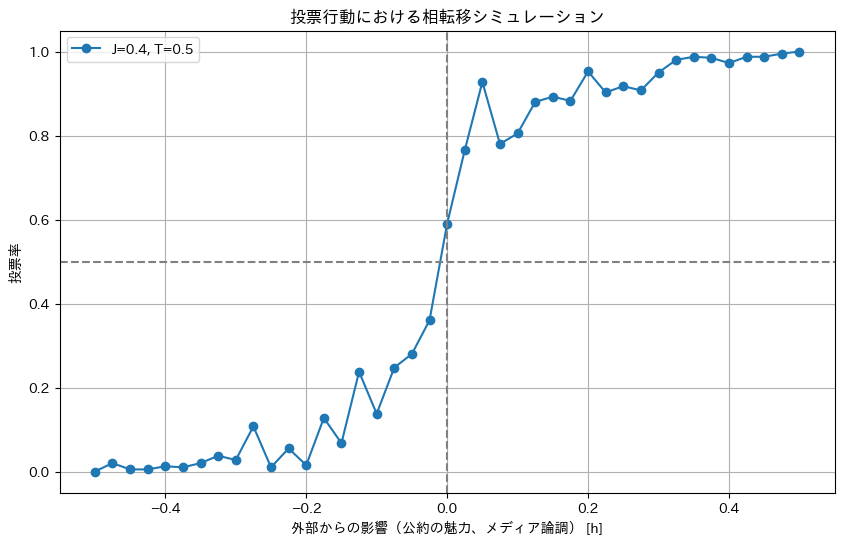

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib # 日本語表示のため

# --- シミュレーションの基本設定 ---
L = 20  # L×Lの格子状の社会を想定 (有権者数 = L*L = 400)
J = 0.4  # 同調圧力の強さ（周囲に合わせたい度合い）
T = 0.5  # 社会の不確実性（温度、気まぐれ度）
mc_steps = 2000  # 各hでのシミュレーション回数（意見が安定するまで）
h_values = np.linspace(-0.5, 0.5, 41) # 外部影響hを-0.5から0.5まで変化させる

# --- シミュレーション本体 ---
final_voting_rates = []

# hの値をループで変化させる
for h in h_values:
    # 初期状態：意見はランダム（投票: +1, 棄権: -1）
    spins = np.random.choice([-1, 1], size=(L, L))

    # モンテカルロシミュレーション（意見の更新プロセス）
    for step in range(mc_steps):
        # ランダムに一人の有権者を選ぶ
        i, j = np.random.randint(0, L, 2)

        # 周囲の意見の合計を計算（周期境界条件）
        neighbor_sum = (
            spins[(i + 1) % L, j] +
            spins[(i - 1) % L, j] +
            spins[i, (j + 1) % L] +
            spins[i, (j - 1) % L]
        )

        # この有権者が態度を変えることによるエネルギー変化
        # （周りに同調し、外部影響に従うとエネルギーは下がる＝安定する）
        delta_E = 2 * spins[i, j] * (J * neighbor_sum + h)

        # メトロポリス法による態度決定
        # エネルギーが下がるなら必ず態度を変える
        # エネルギーが上がる場合でも、T（気まぐれ度）に応じた確率で態度を変える
        if delta_E < 0 or np.random.rand() < np.exp(-delta_E / T):
            spins[i, j] *= -1

    # シミュレーション後の投票率（+1の人の割合）を計算
    voting_rate = np.mean(spins == 1)
    final_voting_rates.append(voting_rate)
    print(f"h = {h:.2f}, 投票率 = {voting_rate:.3f}")

# --- グラフ描画 ---
plt.figure(figsize=(10, 6))
plt.plot(h_values, final_voting_rates, 'o-', label=f'J={J}, T={T}')
plt.axvline(0, color='gray', linestyle='--') # 外部影響が中立の線
plt.axhline(0.5, color='gray', linestyle='--') # 投票率50%の線
plt.xlabel('外部からの影響（公約の魅力、メディア論調） [h]')
plt.ylabel('投票率')
plt.title('投票行動における相転移シミュレーション')
plt.legend()
plt.grid(True)
plt.show()

これで、相転移が起きうることは示せたと思う。そのタイミングで投票を決定する効用は大きいはず。